## Muestreo y aliasing

### El aliasing es un efecto que hace que una señal aparezca con una frecuencia que no es la esperada.

Este efecto ocurre cuando se muestrea la señal a una frecuencia de muestreo Fs que no cumple el teorema de Nyquist, que dice que la misma debe ser mayor al doble del ancho de banda de la señal que se está muestreando.

### Para pasar de dominio de tiempo a frecuencia, utilizo la transformada de Fourier en tiempo discreto.
El algoritmo para calcularla es la FFT (Fast Fourier Transform)
## Funciones usadas:
- fft -> calcula la transformada en sí
- abs -> fft da resultado complejo, y nos interesa el módulo.
- fftshift -> desplaza el valor 0 de la respuesta en frecuencia hacia el centro del espectro.
- fftfreq -> devuelve las frecuencias para el eje "x" (el de frecuencias)

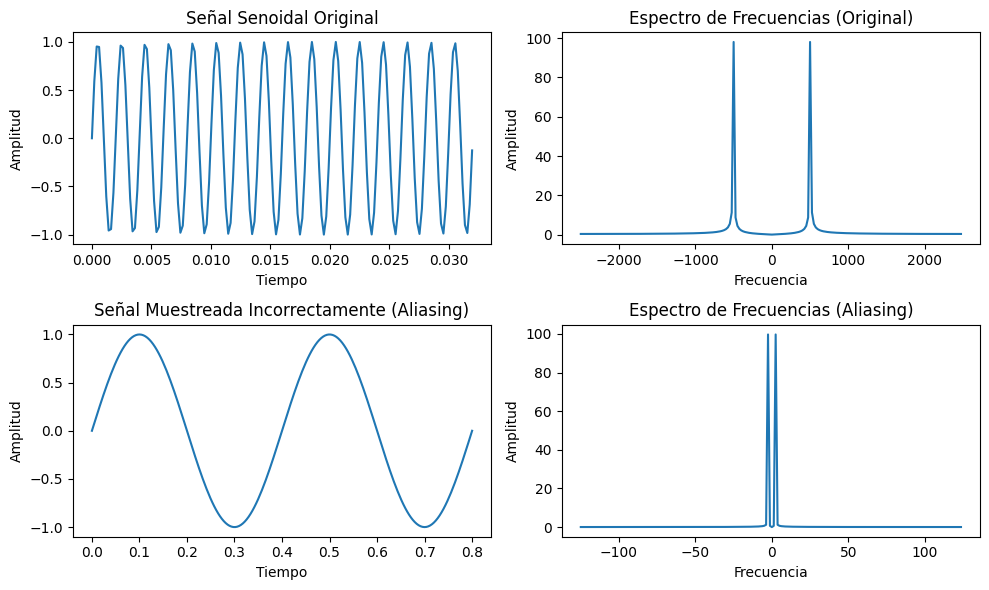

In [1]:
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

N = 200
# Parámetros de la señal
fs = 500  # Frecuencia de la señal
f_muestreo_correcta = 10 * fs  # Frecuencia de muestreo correcta (más del doble de la frecuencia de la señal)

# Vector de tiempo
t = np.linspace(0,N/f_muestreo_correcta,num=N)

# Señal senoidal original
senal_original = np.sin(2 * np.pi * fs * t)

# Muestrear la señal con una frecuencia de muestreo que no cumple con el teorema de Nyquist
f_muestreo_erronea = fs / 2  # frecuencia de muestreo menor que el doble de la frecuencia de la señal
t_erronea = np.linspace(0,N/f_muestreo_erronea,num=N)
senal_erronea = np.sin(2 * np.pi * fs * t_erronea)

# Calcular la transformada de Fourier de ambas señales
espectro_original = fft(senal_original)
espectro_erronea = fft(senal_erronea)

# Visualizar las señales y sus espectros
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Señal original
axs[0, 0].plot(t[0:int(80*N/100)], senal_original[0:int(80*N/100)])
axs[0, 0].set_title('Señal Senoidal Original')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].set_ylabel('Amplitud')

# Espectro de la señal original
axs[0, 1].plot(np.fft.fftshift(np.fft.fftfreq(len(t), 1/f_muestreo_correcta)), np.fft.fftshift(np.abs(espectro_original)))
axs[0, 1].set_title('Espectro de Frecuencias (Original)')
axs[0, 1].set_xlabel('Frecuencia')
axs[0, 1].set_ylabel('Amplitud')

# Señal muestreada erróneamente (con aliasing)
axs[1, 0].plot(t_erronea, senal_erronea)
axs[1, 0].set_title('Señal Muestreada Incorrectamente (Aliasing)')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('Amplitud')

# Espectro de la señal con aliasing
axs[1, 1].plot(np.fft.fftshift(np.fft.fftfreq(len(t_erronea), 1/f_muestreo_erronea)), np.fft.fftshift(np.abs(espectro_erronea)))
axs[1, 1].set_title('Espectro de Frecuencias (Aliasing)')
axs[1, 1].set_xlabel('Frecuencia')
axs[1, 1].set_ylabel('Amplitud')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Aliasing en imágenes
Simplemente vamos a ver como se ve el alias en una imagen

(622, 756)


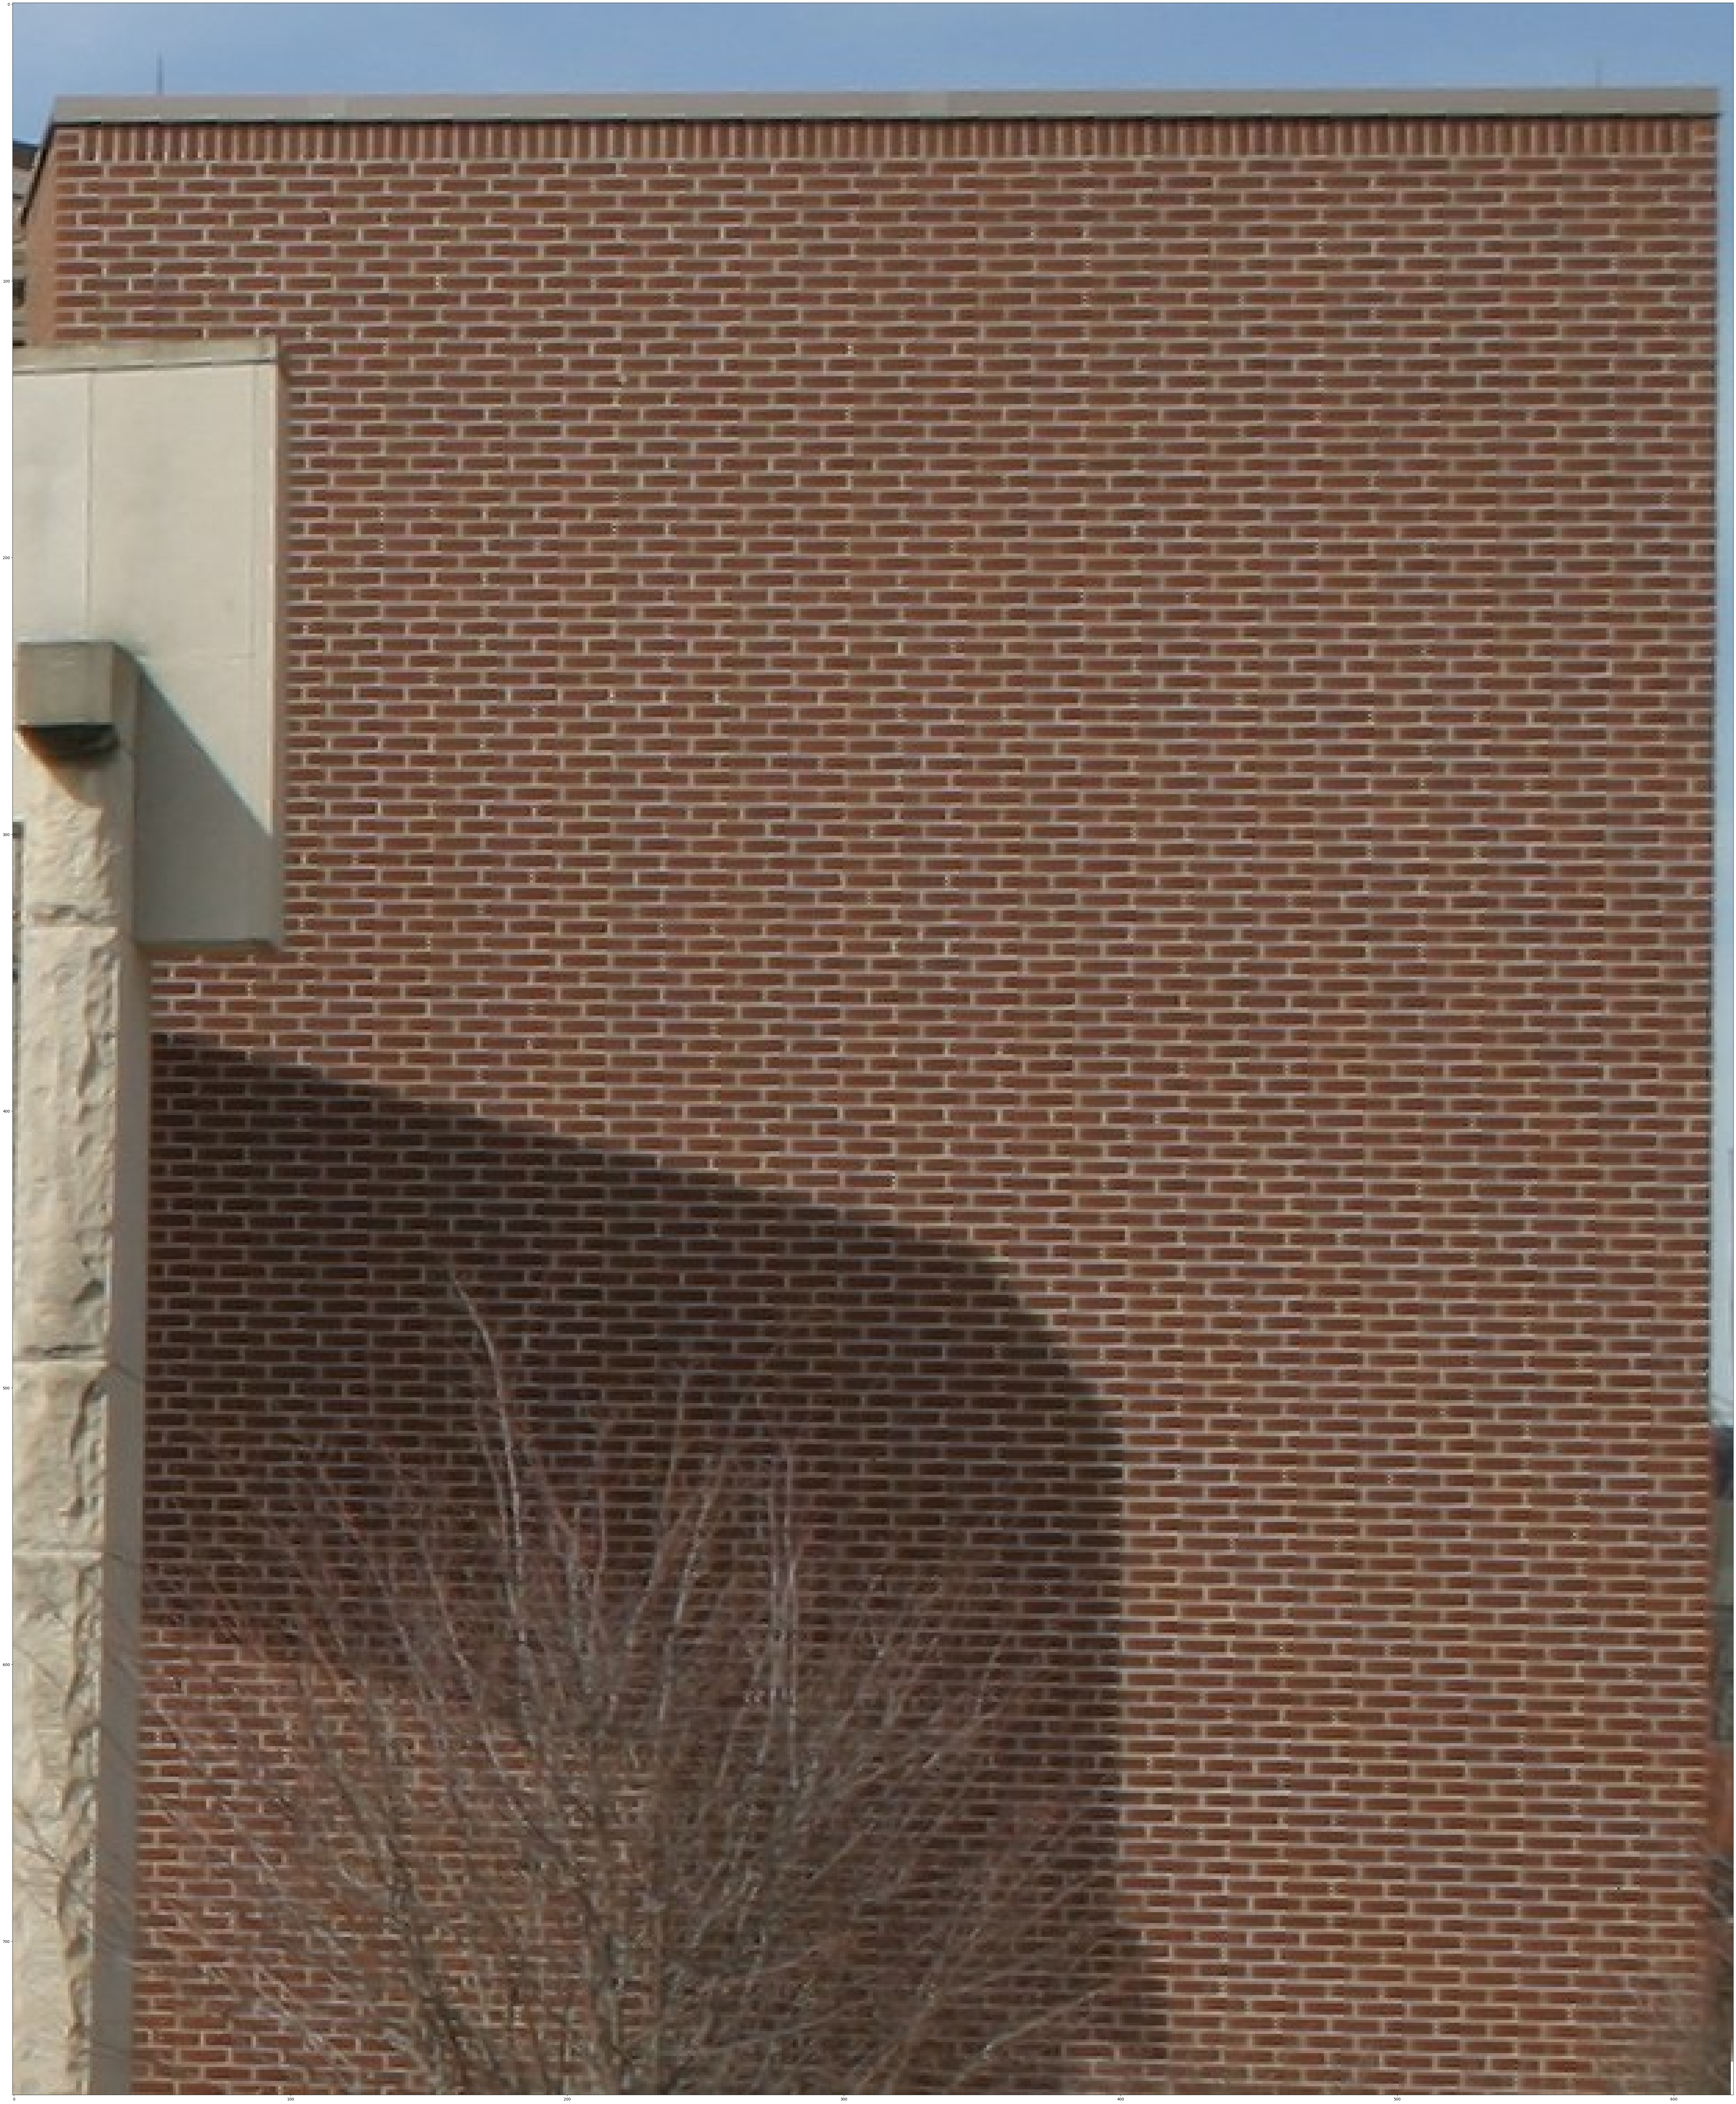

In [2]:
import scipy.signal as sig
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

myPath = ''
img = Image.open(myPath+'img/bricks.jpg')
plt.figure(figsize = (100,100))
print (img.size)
plt.imshow(img, interpolation='nearest')


(411, 500)


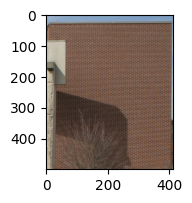

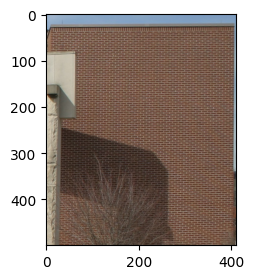

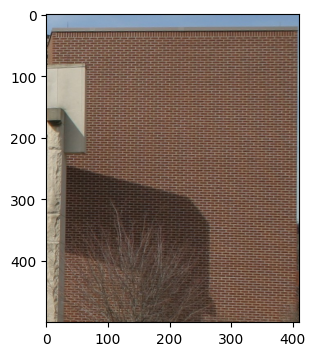

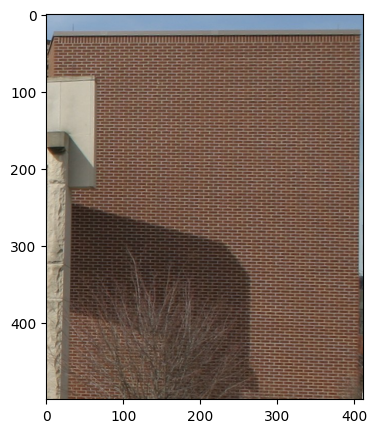

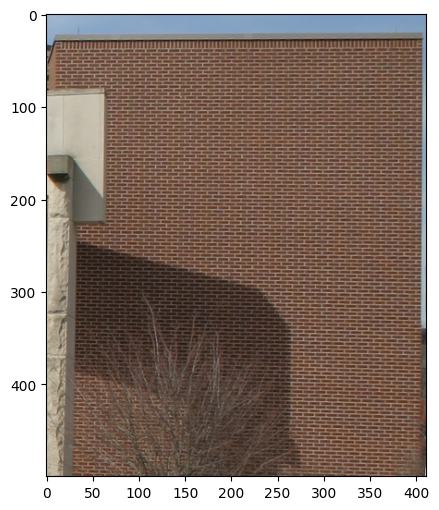

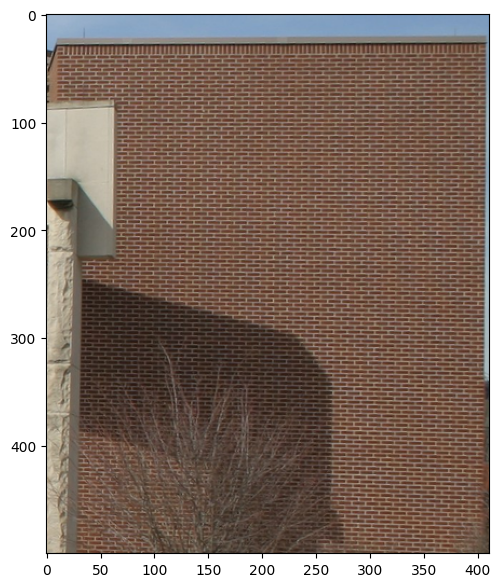

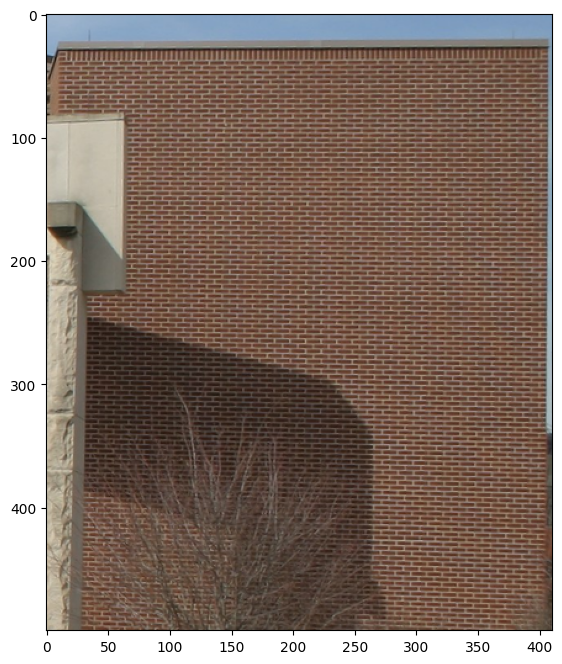

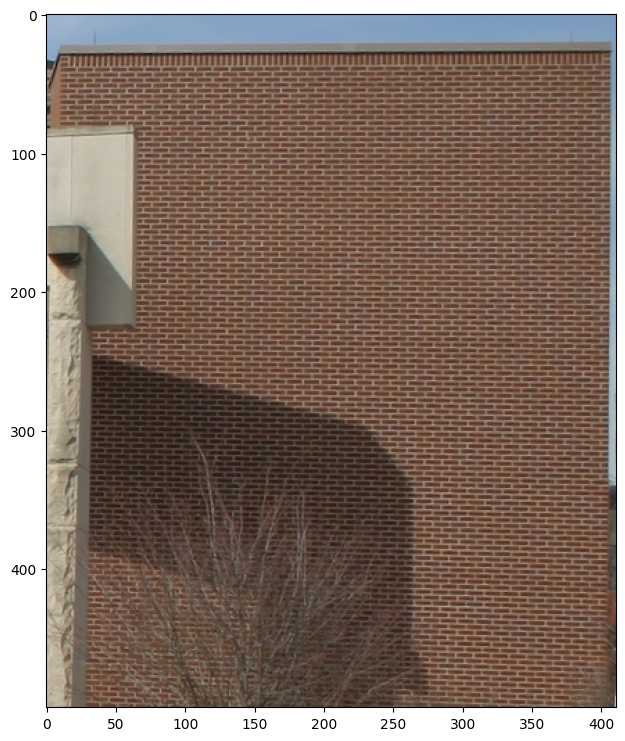

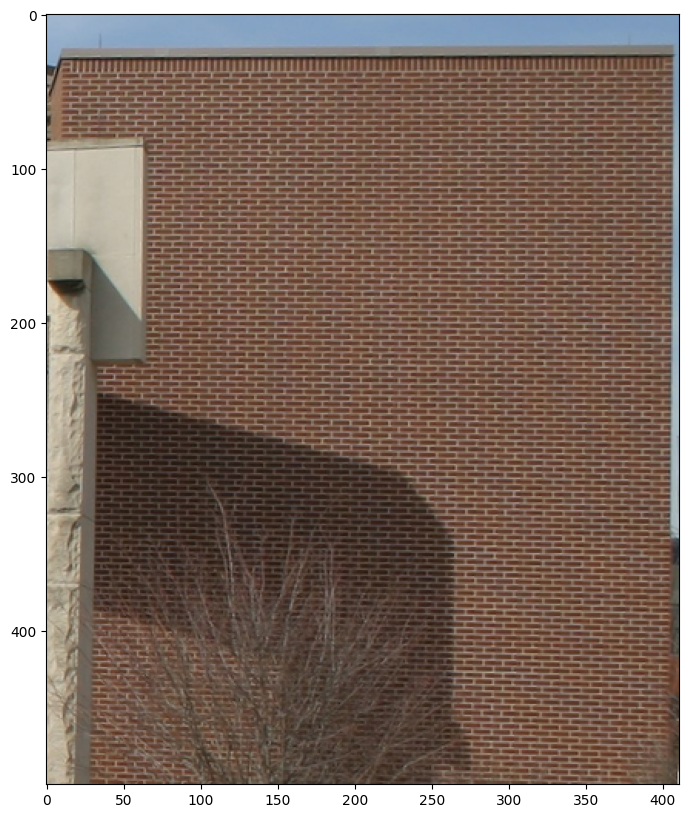

In [6]:
img = Image.open(myPath+'img/bricks.jpg')

img.thumbnail((500, 500), Image.LANCZOS)
#img = img.resize((400, 400))

#interpolation='nearest'
interpolation='antialiased'

print (img.size)
plt.figure(figsize = (2,2))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (3,3))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (4,4))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (5,5))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (6,6))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (7,7))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (8,8))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (9,9))
plt.imshow(img, interpolation=interpolation)
plt.figure(figsize = (10,10))
plt.imshow(img, interpolation=interpolation)

(200, 200)


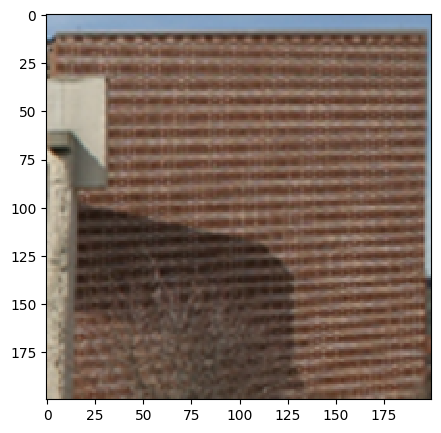

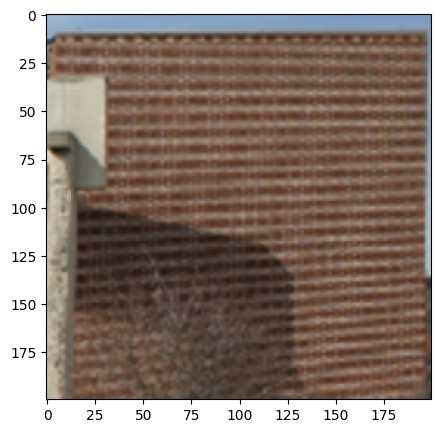

In [5]:
img.thumbnail((124, 151), Image.LANCZOS)
img = img.resize((200, 200))
print (img.size)
plt.figure(figsize = (5,5))
plt.imshow(img, interpolation='nearest')
plt.figure(figsize = (5,5))
plt.imshow(img, interpolation='antialiased')